# SQL Básico para Ingeniería de Datos

## Objetivos de Aprendizaje
- Comprender los conceptos fundamentales de bases de datos relacionales
- Dominar las consultas SQL básicas (SELECT, WHERE, JOIN, GROUP BY)
- Trabajar con SQLite desde Python
- Realizar operaciones CRUD (Create, Read, Update, Delete)
- Integrar SQL con Pandas para análisis de datos

## Requisitos
- Python 3.8+
- sqlite3 (incluido en Python)
- pandas
- sqlalchemy

### 📖 SQL en Python - Trabajando con Bases de Datos

**¿Por qué SQL es fundamental para Data Engineering?**
SQL (Structured Query Language) es el **lenguaje universal** de las bases de datos:
- **Ubicuo**: Presente en PostgreSQL, MySQL, SQL Server, Oracle, SQLite, BigQuery
- **Declarativo**: Dices QUÉ quieres, no CÓMO obtenerlo
- **Optimizado**: Motores de DB optimizan tus queries automáticamente
- **Estándar**: Sintaxis similar en todos los sistemas

**¿Por qué SQLite para este curso?**
- **No requiere instalación**: Viene incluido con Python
- **Archivo único**: Toda la BD en un archivo `.db`
- **Perfecto para desarrollo**: Prototipado y testing
- **Sintaxis SQL estándar**: Lo aprendido aplica a otras DBs

**sqlite3 - El módulo built-in:**
```python
import sqlite3
```
- Viene incluido con Python (no necesitas `pip install`)
- Interfaz simple para crear y consultar bases de datos
- Ideal para aplicaciones ligeras y aprendizaje

**Flujo típico:**
1. **Conectar** a una base de datos (o crearla si no existe)
2. **Crear** tablas con esquemas definidos
3. **Insertar** datos (INSERT)
4. **Consultar** datos (SELECT)
5. **Actualizar** datos (UPDATE)
6. **Eliminar** datos (DELETE)
7. **Cerrar** conexión

**En este notebook aprenderás:**
1. Conectarte a bases de datos SQLite
2. Crear tablas con tipos de datos apropiados
3. Ejecutar queries básicos: SELECT, WHERE, JOIN, GROUP BY
4. Integrar SQL con pandas para análisis
5. Best practices de manejo de conexiones

In [1]:
# Instalación de dependencias
import sys
!{sys.executable} -m pip install pandas sqlalchemy -q


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Luis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 📖 Conexión a SQLite - El Primer Paso

**¿Qué hace `sqlite3.connect()`?**
Crea (o abre) una base de datos SQLite y establece una conexión:

```python
conn = sqlite3.connect('nombre_base.db')
```

**Dos modos de operación:**

**1. Base de datos persistente (archivo):**
```python
conn = sqlite3.connect('mi_base.db')
```
- Crea el archivo `mi_base.db` en el disco
- Los datos persisten después de cerrar Python
- Puedes compartir el archivo `.db`

**2. Base de datos en memoria (temporal):**
```python
conn = sqlite3.connect(':memory:')
```
- Todo en RAM (súper rápido)
- Se pierde al cerrar la conexión
- Ideal para testing y datos temporales

**El objeto conexión (`conn`):**
Es tu **canal de comunicación** con la base de datos:
- Creas tablas a través de él
- Ejecutas queries
- Haces commits de transacciones
- Lo cierras cuando terminas

**Cursor - El ejecutor de queries:**
```python
cursor = conn.cursor()
cursor.execute("SELECT * FROM tabla")
```

**Analogía:**
- **Conexión**: Como la llamada telefónica (el canal)
- **Cursor**: Como hablar por el teléfono (la comunicación)

**Best practices:**
- ✅ Usa `with` o `try-finally` para cerrar conexión
- ✅ Cierra cursores después de usarlos
- ✅ Una conexión por base de datos
- ⚠️ No dejes conexiones abiertas indefinidamente

**En este bloque:**
Simplemente importamos sqlite3 y creamos una conexión a una base de datos en memoria para practicar.

In [2]:
import sqlite3
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import os

print("SQLite version:", sqlite3.sqlite_version)
print("Pandas version:", pd.__version__)

SQLite version: 3.49.1
Pandas version: 2.3.3


## 1. Conexión a Base de Datos SQLite

### 📖 Creando Tablas - Definiendo la Estructura de Datos

**CREATE TABLE - El comando fundacional**

Antes de insertar datos, necesitas **definir el esquema** (estructura):
- Nombres de columnas
- Tipos de datos
- Restricciones (constraints)

**Tipos de datos en SQLite:**

| Tipo SQL | Python equiv. | Descripción | Ejemplo |
|----------|---------------|-------------|---------|
| `INTEGER` | int | Números enteros | 1, 100, -50 |
| `REAL` | float | Números decimales | 3.14, 99.99 |
| `TEXT` | str | Cadenas de texto | 'Ana', 'Madrid' |
| `BLOB` | bytes | Datos binarios | Imágenes, archivos |
| `NULL` | None | Valor ausente | None |

**Restricciones comunes:**
- `PRIMARY KEY`: Identificador único de cada fila
- `NOT NULL`: Campo obligatorio
- `UNIQUE`: No puede haber duplicados
- `DEFAULT`: Valor por defecto si no se especifica
- `FOREIGN KEY`: Referencia a otra tabla

**En este bloque:**
Creamos 3 tablas relacionadas típicas de un sistema de ventas con claves primarias y campos NOT NULL para integridad de datos.

In [3]:
# Crear conexión a base de datos SQLite (se crea si no existe)
db_path = '../../datasets/raw/tienda.db'
os.makedirs(os.path.dirname(db_path), exist_ok=True)

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print(f"Conexión establecida a: {db_path}")

Conexión establecida a: ../../datasets/raw/tienda.db


## 2. Creación de Tablas

### 📖 INSERT - Cargando Datos en las Tablas

**Sintaxis básica:**
```sql
INSERT INTO tabla (columna1, columna2, columna3)
VALUES (valor1, valor2, valor3);
```

**Dos formas comunes:**

**1. Valores explícitos:**
```sql
INSERT INTO clientes (id, nombre, email, ciudad)
VALUES (1, 'Ana García', 'ana@email.com', 'Madrid');
```

**2. Múltiples filas a la vez:**
```sql
INSERT INTO clientes VALUES
(1, 'Ana', 'ana@email.com', 'Madrid'),
(2, 'Luis', 'luis@email.com', 'Barcelona'),
(3, 'Carlos', 'carlos@email.com', 'Valencia');
```

**Desde Python con executemany:**
```python
datos = [(1, 'Ana', 'ana@email.com'), (2, 'Luis', 'luis@email.com')]
cursor.executemany('INSERT INTO clientes VALUES (?, ?, ?)', datos)
```

**⚠️ Importante:**
- Usa `?` placeholders para evitar SQL injection
- Siempre haz `conn.commit()` después de INSERT/UPDATE/DELETE
- Sin commit, los cambios se pierden

In [4]:
# Crear tabla de clientes
cursor.execute('''
CREATE TABLE IF NOT EXISTS clientes (
    cliente_id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    ciudad TEXT,
    fecha_registro DATE,
    activo INTEGER DEFAULT 1
)
''')

print("Tabla 'clientes' creada")

Tabla 'clientes' creada


In [5]:
# Crear tabla de productos
cursor.execute('''
CREATE TABLE IF NOT EXISTS productos (
    producto_id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre TEXT NOT NULL,
    categoria TEXT,
    precio REAL NOT NULL,
    stock INTEGER DEFAULT 0,
    fecha_creacion TIMESTAMP DEFAULT CURRENT_TIMESTAMP
)
''')

print("Tabla 'productos' creada")

Tabla 'productos' creada


In [6]:
# Crear tabla de ventas
cursor.execute('''
CREATE TABLE IF NOT EXISTS ventas (
    venta_id INTEGER PRIMARY KEY AUTOINCREMENT,
    cliente_id INTEGER,
    producto_id INTEGER,
    cantidad INTEGER NOT NULL,
    fecha_venta DATE,
    total REAL,
    FOREIGN KEY (cliente_id) REFERENCES clientes(cliente_id),
    FOREIGN KEY (producto_id) REFERENCES productos(producto_id)
)
''')

conn.commit()
print("Tabla 'ventas' creada")

Tabla 'ventas' creada


## 3. Inserción de Datos (INSERT)

### 📖 SELECT - La Query Más Importante

**SELECT es el corazón de SQL** - recupera datos de tablas.

**Sintaxis básica:**
```sql
SELECT columna1, columna2
FROM tabla
WHERE condicion
ORDER BY columna;
```

**Variantes:**
- `SELECT *` - Todas las columnas (evitar en producción)
- `SELECT DISTINCT columna` - Valores únicos
- `SELECT COUNT(*)` - Contar filas
- `SELECT columna AS alias` - Renombrar columna

**Cláusulas principales:**
- `WHERE`: Filtrar filas (condiciones)
- `ORDER BY`: Ordenar resultados (ASC/DESC)
- `LIMIT`: Limitar número de resultados
- `GROUP BY`: Agrupar para agregaciones
- `HAVING`: Filtrar después de GROUP BY

**Operadores WHERE:**
- `=, !=, <, >, <=, >=`: Comparación
- `AND, OR, NOT`: Lógicos
- `IN (lista)`: Está en lista
- `LIKE 'patrón'`: Búsqueda de texto
- `BETWEEN a AND b`: Rango
- `IS NULL / IS NOT NULL`: Valores nulos

In [7]:
# Insertar clientes
clientes_data = [
    ('Juan Pérez', 'juan@email.com', 'Madrid', '2024-01-15'),
    ('María García', 'maria@email.com', 'Barcelona', '2024-02-20'),
    ('Pedro Martínez', 'pedro@email.com', 'Valencia', '2024-03-10'),
    ('Ana López', 'ana@email.com', 'Madrid', '2024-04-05'),
    ('Luis Rodríguez', 'luis@email.com', 'Sevilla', '2024-05-12')
]

cursor.executemany('''
INSERT OR IGNORE INTO clientes (nombre, email, ciudad, fecha_registro)
VALUES (?, ?, ?, ?)
''', clientes_data)

conn.commit()
print(f"Insertados {cursor.rowcount} clientes")

Insertados 5 clientes


In [8]:
# Insertar productos
productos_data = [
    ('Laptop Dell XPS', 'Electrónica', 1200.00, 15),
    ('Mouse Logitech', 'Accesorios', 25.00, 50),
    ('Teclado Mecánico', 'Accesorios', 75.00, 30),
    ('Monitor Samsung 27"', 'Electrónica', 300.00, 20),
    ('Webcam HD', 'Accesorios', 80.00, 25),
    ('SSD 1TB', 'Almacenamiento', 150.00, 40),
    ('RAM 16GB', 'Componentes', 100.00, 35)
]

cursor.executemany('''
INSERT OR IGNORE INTO productos (nombre, categoria, precio, stock)
VALUES (?, ?, ?, ?)
''', productos_data)

conn.commit()
print(f"Insertados {len(productos_data)} productos")

Insertados 7 productos


In [9]:
# Insertar ventas
ventas_data = [
    (1, 1, 1, '2024-06-01', 1200.00),
    (2, 2, 2, '2024-06-02', 50.00),
    (3, 3, 3, '2024-06-03', 225.00),
    (1, 4, 1, '2024-06-04', 300.00),
    (4, 5, 2, '2024-06-05', 160.00),
    (2, 6, 1, '2024-06-06', 150.00),
    (5, 2, 5, '2024-06-07', 125.00),
    (3, 1, 2, '2024-06-08', 2400.00),
    (1, 3, 1, '2024-06-09', 75.00),
    (4, 7, 3, '2024-06-10', 300.00)
]

cursor.executemany('''
INSERT OR IGNORE INTO ventas (cliente_id, producto_id, cantidad, fecha_venta, total)
VALUES (?, ?, ?, ?, ?)
''', ventas_data)

conn.commit()
print(f"Insertadas {len(ventas_data)} ventas")

Insertadas 10 ventas


## 4. Consultas Básicas (SELECT)

### 📖 Filtrado con WHERE - Encontrando Filas Específicas

**WHERE es como el filtrado booleano de pandas** - selecciona solo filas que cumplen condiciones.

**Comparaciones numéricas:**
```sql
WHERE edad > 25
WHERE precio >= 100 AND precio <= 500
WHERE stock != 0
```

**Texto:**
```sql
WHERE ciudad = 'Madrid'
WHERE nombre LIKE 'A%'      -- Empieza con A
WHERE email LIKE '%@gmail.com'  -- Termina con @gmail.com
WHERE descripcion LIKE '%urgente%'  -- Contiene 'urgente'
```

**Listas:**
```sql
WHERE ciudad IN ('Madrid', 'Barcelona', 'Valencia')
WHERE categoria NOT IN ('descontinuado', 'agotado')
```

**Combinaciones:**
```sql
WHERE (edad > 18 AND ciudad = 'Madrid') OR status = 'VIP'
WHERE precio BETWEEN 100 AND 500
WHERE fecha >= '2024-01-01'
```

**Patrones LIKE:**
- `%` = Cualquier secuencia de caracteres
- `_` = Un solo caracter
- Ejemplo: `'A_a'` matchea 'Ana', 'Ara', pero no 'Alicia'

In [10]:
# SELECT simple - Todos los clientes
query = "SELECT * FROM clientes"
df_clientes = pd.read_sql_query(query, conn)
print("Todos los clientes:")
print(df_clientes)

Todos los clientes:
   cliente_id          nombre            email     ciudad fecha_registro  \
0           1      Juan Pérez   juan@email.com     Madrid     2024-01-15   
1           2    María García  maria@email.com  Barcelona     2024-02-20   
2           3  Pedro Martínez  pedro@email.com   Valencia     2024-03-10   
3           4       Ana López    ana@email.com     Madrid     2024-04-05   
4           5  Luis Rodríguez   luis@email.com    Sevilla     2024-05-12   

   activo  
0       1  
1       1  
2       1  
3       1  
4       1  


In [11]:
# SELECT con columnas específicas
query = "SELECT nombre, email, ciudad FROM clientes"
df = pd.read_sql_query(query, conn)
print("Clientes - Nombre, Email, Ciudad:")
print(df)

Clientes - Nombre, Email, Ciudad:
           nombre            email     ciudad
0      Juan Pérez   juan@email.com     Madrid
1    María García  maria@email.com  Barcelona
2  Pedro Martínez  pedro@email.com   Valencia
3       Ana López    ana@email.com     Madrid
4  Luis Rodríguez   luis@email.com    Sevilla


In [12]:
# SELECT con WHERE - Filtrado
query = "SELECT * FROM productos WHERE categoria = 'Accesorios'"
df = pd.read_sql_query(query, conn)
print("Productos de categoría 'Accesorios':")
print(df)

Productos de categoría 'Accesorios':
   producto_id            nombre   categoria  precio  stock  \
0            2    Mouse Logitech  Accesorios    25.0     50   
1            3  Teclado Mecánico  Accesorios    75.0     30   
2            5         Webcam HD  Accesorios    80.0     25   

        fecha_creacion  
0  2025-12-07 22:01:57  
1  2025-12-07 22:01:57  
2  2025-12-07 22:01:57  


In [13]:
# SELECT con múltiples condiciones
query = '''
SELECT nombre, precio, stock
FROM productos
WHERE precio > 100 AND stock > 20
'''
df = pd.read_sql_query(query, conn)
print("Productos con precio > $100 y stock > 20:")
print(df)

Productos con precio > $100 y stock > 20:
    nombre  precio  stock
0  SSD 1TB   150.0     40


In [14]:
# SELECT con ORDER BY
query = '''
SELECT nombre, precio
FROM productos
ORDER BY precio DESC
LIMIT 5
'''
df = pd.read_sql_query(query, conn)
print("Top 5 productos más caros:")
print(df)

Top 5 productos más caros:
                nombre  precio
0      Laptop Dell XPS  1200.0
1  Monitor Samsung 27"   300.0
2              SSD 1TB   150.0
3             RAM 16GB   100.0
4            Webcam HD    80.0


## 5. Funciones de Agregación

### 📖 GROUP BY y Funciones de Agregación

**GROUP BY = El groupby() de pandas en SQL**

Agrupa filas por valores únicos y aplica funciones de agregación.

**Funciones de agregación:**

| Función | Qué hace | Ejemplo |
|---------|----------|---------|
| `COUNT(*)` | Cuenta filas | Número de pedidos |
| `SUM(columna)` | Suma total | Ingresos totales |
| `AVG(columna)` | Promedio | Precio promedio |
| `MAX(columna)` | Máximo | Pedido más alto |
| `MIN(columna)` | Mínimo | Pedido más bajo |

**Patrón básico:**
```sql
SELECT columna_grupo, FUNCION(columna_agregada)
FROM tabla
GROUP BY columna_grupo;
```

**Ejemplos:**
```sql
-- Ventas por región
SELECT region, SUM(total) as ventas_totales
FROM ventas
GROUP BY region;

-- Promedio de edad por ciudad
SELECT ciudad, AVG(edad) as edad_promedio
FROM usuarios
GROUP BY ciudad;

-- Contar productos por categoría
SELECT categoria, COUNT(*) as cantidad
FROM productos
GROUP BY categoria;
```

**HAVING vs WHERE:**
- `WHERE`: Filtra ANTES de agrupar (filas individuales)
- `HAVING`: Filtra DESPUÉS de agrupar (grupos)

```sql
-- Solo regiones con ventas > 10000
SELECT region, SUM(total)
FROM ventas
GROUP BY region
HAVING SUM(total) > 10000;
```

In [15]:
# COUNT, SUM, AVG, MAX, MIN
query = '''
SELECT 
    COUNT(*) as total_productos,
    SUM(stock) as stock_total,
    AVG(precio) as precio_promedio,
    MAX(precio) as precio_maximo,
    MIN(precio) as precio_minimo
FROM productos
'''
df = pd.read_sql_query(query, conn)
print("Estadísticas de productos:")
print(df)

Estadísticas de productos:
   total_productos  stock_total  precio_promedio  precio_maximo  precio_minimo
0                7          215       275.714286         1200.0           25.0


In [16]:
# GROUP BY - Agrupar por categoría
query = '''
SELECT 
    categoria,
    COUNT(*) as num_productos,
    AVG(precio) as precio_promedio,
    SUM(stock) as stock_total
FROM productos
GROUP BY categoria
ORDER BY num_productos DESC
'''
df = pd.read_sql_query(query, conn)
print("Productos por categoría:")
print(df)

Productos por categoría:
        categoria  num_productos  precio_promedio  stock_total
0      Accesorios              3             60.0          105
1     Electrónica              2            750.0           35
2     Componentes              1            100.0           35
3  Almacenamiento              1            150.0           40


In [17]:
# GROUP BY con HAVING - Filtrar grupos
query = '''
SELECT 
    categoria,
    COUNT(*) as num_productos,
    AVG(precio) as precio_promedio
FROM productos
GROUP BY categoria
HAVING COUNT(*) >= 2
'''
df = pd.read_sql_query(query, conn)
print("Categorías con 2 o más productos:")
print(df)

Categorías con 2 o más productos:
     categoria  num_productos  precio_promedio
0   Accesorios              3             60.0
1  Electrónica              2            750.0


## 6. JOINs - Combinar Tablas

### 📖 ORDER BY - Ordenando Resultados

**Controla el orden de los resultados** (como sort_values en pandas).

**Sintaxis:**
```sql
SELECT columna1, columna2
FROM tabla
ORDER BY columna1 ASC,  -- Ascendente (menor a mayor)
         columna2 DESC; -- Descendente (mayor a menor)
```

**Ejemplos:**
```sql
-- Top 10 productos más vendidos
SELECT producto, ventas
FROM productos
ORDER BY ventas DESC
LIMIT 10;

-- Usuarios por edad y nombre
SELECT nombre, edad
FROM usuarios
ORDER BY edad DESC, nombre ASC;

-- Ventas recientes
SELECT fecha, total
FROM ventas
ORDER BY fecha DESC;
```

**Default:** Si no especificas ASC/DESC, el default es **ASC**

**LIMIT:** Combina con ORDER BY para obtener Top N:
```sql
SELECT * FROM productos ORDER BY precio DESC LIMIT 5;
```

In [18]:
# INNER JOIN - Ventas con información de clientes
query = '''
SELECT 
    v.venta_id,
    c.nombre as cliente,
    v.cantidad,
    v.total,
    v.fecha_venta
FROM ventas v
INNER JOIN clientes c ON v.cliente_id = c.cliente_id
ORDER BY v.fecha_venta
'''
df = pd.read_sql_query(query, conn)
print("Ventas con información de clientes:")
print(df)

Ventas con información de clientes:
   venta_id         cliente  cantidad   total fecha_venta
0         1      Juan Pérez         1  1200.0  2024-06-01
1         2    María García         2    50.0  2024-06-02
2         3  Pedro Martínez         3   225.0  2024-06-03
3         4      Juan Pérez         1   300.0  2024-06-04
4         5       Ana López         2   160.0  2024-06-05
5         6    María García         1   150.0  2024-06-06
6         7  Luis Rodríguez         5   125.0  2024-06-07
7         8  Pedro Martínez         2  2400.0  2024-06-08
8         9      Juan Pérez         1    75.0  2024-06-09
9        10       Ana López         3   300.0  2024-06-10


In [19]:
# JOIN múltiple - Ventas completas
query = '''
SELECT 
    v.venta_id,
    c.nombre as cliente,
    p.nombre as producto,
    p.categoria,
    v.cantidad,
    v.total,
    v.fecha_venta
FROM ventas v
INNER JOIN clientes c ON v.cliente_id = c.cliente_id
INNER JOIN productos p ON v.producto_id = p.producto_id
ORDER BY v.fecha_venta DESC
'''
df = pd.read_sql_query(query, conn)
print("Información completa de ventas:")
print(df.head(10))

Información completa de ventas:
   venta_id         cliente             producto       categoria  cantidad  \
0        10       Ana López             RAM 16GB     Componentes         3   
1         9      Juan Pérez     Teclado Mecánico      Accesorios         1   
2         8  Pedro Martínez      Laptop Dell XPS     Electrónica         2   
3         7  Luis Rodríguez       Mouse Logitech      Accesorios         5   
4         6    María García              SSD 1TB  Almacenamiento         1   
5         5       Ana López            Webcam HD      Accesorios         2   
6         4      Juan Pérez  Monitor Samsung 27"     Electrónica         1   
7         3  Pedro Martínez     Teclado Mecánico      Accesorios         3   
8         2    María García       Mouse Logitech      Accesorios         2   
9         1      Juan Pérez      Laptop Dell XPS     Electrónica         1   

    total fecha_venta  
0   300.0  2024-06-10  
1    75.0  2024-06-09  
2  2400.0  2024-06-08  
3   125.0  20

In [20]:
# LEFT JOIN - Todos los clientes con sus ventas
query = '''
SELECT 
    c.nombre as cliente,
    COUNT(v.venta_id) as num_compras,
    COALESCE(SUM(v.total), 0) as total_gastado
FROM clientes c
LEFT JOIN ventas v ON c.cliente_id = v.cliente_id
GROUP BY c.cliente_id, c.nombre
ORDER BY total_gastado DESC
'''
df = pd.read_sql_query(query, conn)
print("Resumen de compras por cliente:")
print(df)

Resumen de compras por cliente:
          cliente  num_compras  total_gastado
0  Pedro Martínez            2         2625.0
1      Juan Pérez            3         1575.0
2       Ana López            2          460.0
3    María García            2          200.0
4  Luis Rodríguez            1          125.0


## 7. Subconsultas

### 📖 JOINs - Relacionando Tablas

**JOINs = pd.merge() en SQL** - combina datos de múltiples tablas.

**Tipos de JOINs:**

| Tipo | Qué retorna | Cuándo usar |
|------|-------------|-------------|
| **INNER JOIN** | Solo matches (intersección) | Lo más común - datos relacionados |
| **LEFT JOIN** | Todas de izquierda + matches | Mantener tabla principal completa |
| **RIGHT JOIN** | Todas de derecha + matches | Raramente usado (usa LEFT invertido) |
| **FULL OUTER JOIN** | Todas (unión) | SQLite NO lo soporta nativamente |

**INNER JOIN - Solo registros con match:**
```sql
SELECT clientes.nombre, pedidos.fecha, pedidos.total
FROM clientes
INNER JOIN pedidos ON clientes.id = pedidos.cliente_id;
```

**LEFT JOIN - Todos los clientes, con o sin pedidos:**
```sql
SELECT clientes.nombre, COUNT(pedidos.id) as num_pedidos
FROM clientes
LEFT JOIN pedidos ON clientes.id = pedidos.cliente_id
GROUP BY clientes.id, clientes.nombre;
```

**Múltiples JOINs:**
```sql
SELECT c.nombre, p.fecha, pr.nombre_producto, pr.precio
FROM clientes c
JOIN pedidos p ON c.id = p.cliente_id
JOIN productos pr ON p.producto_id = pr.id;
```

**Alias de tablas:** Usa `c`, `p`, `pr` para escribir menos y mejorar legibilidad.

In [21]:
# Subconsulta en WHERE
query = '''
SELECT nombre, precio
FROM productos
WHERE precio > (SELECT AVG(precio) FROM productos)
ORDER BY precio DESC
'''
df = pd.read_sql_query(query, conn)
print("Productos con precio mayor al promedio:")
print(df)

Productos con precio mayor al promedio:
                nombre  precio
0      Laptop Dell XPS  1200.0
1  Monitor Samsung 27"   300.0


In [22]:
# Subconsulta en FROM
query = '''
SELECT 
    categoria,
    AVG(precio) as precio_promedio
FROM productos
WHERE categoria IN (
    SELECT DISTINCT categoria 
    FROM productos 
    WHERE stock > 20
)
GROUP BY categoria
'''
df = pd.read_sql_query(query, conn)
print("Precio promedio por categoría (con stock > 20):")
print(df)

Precio promedio por categoría (con stock > 20):
        categoria  precio_promedio
0      Accesorios             60.0
1  Almacenamiento            150.0
2     Componentes            100.0


## 8. Actualización de Datos (UPDATE)

### 📖 Subconsultas - Queries Dentro de Queries

**Una subconsulta es un SELECT dentro de otro SELECT** - permite lógica compleja.

**Tipos comunes:**

**1. En WHERE (filtrar con resultado de otra query):**
```sql
-- Clientes con pedidos superiores al promedio
SELECT nombre
FROM clientes
WHERE id IN (
    SELECT cliente_id
    FROM pedidos
    WHERE total > (SELECT AVG(total) FROM pedidos)
);
```

**2. En FROM (tabla virtual):**
```sql
-- Ventas por región sobre promedio regional
SELECT region, promedio_ventas
FROM (
    SELECT region, AVG(total) as promedio_ventas
    FROM ventas
    GROUP BY region
) AS subquery
WHERE promedio_ventas > 5000;
```

**3. En SELECT (columna calculada):**
```sql
SELECT nombre,
       (SELECT COUNT(*) FROM pedidos WHERE cliente_id = clientes.id) as total_pedidos
FROM clientes;
```

**Ventajas:** Permite lógica compleja paso a paso
**Desventajas:** Pueden ser lentas - a veces mejor usar JOINs

In [23]:
# UPDATE simple
query = '''
UPDATE productos
SET stock = stock + 10
WHERE categoria = 'Accesorios'
'''
cursor.execute(query)
conn.commit()
print(f"Actualizado stock de {cursor.rowcount} productos")

# Verificar cambios
df = pd.read_sql_query("SELECT nombre, stock FROM productos WHERE categoria = 'Accesorios'", conn)
print("\nStock actualizado:")
print(df)

Actualizado stock de 3 productos

Stock actualizado:
             nombre  stock
0    Mouse Logitech     60
1  Teclado Mecánico     40
2         Webcam HD     35


## 9. Eliminación de Datos (DELETE)

### 📖 UPDATE - Modificando Datos Existentes

**UPDATE cambia valores en filas existentes.**

**Sintaxis:**
```sql
UPDATE tabla
SET columna1 = valor1, columna2 = valor2
WHERE condicion;
```

**⚠️ CRÍTICO: SIEMPRE usa WHERE** o actualizarás TODAS las filas.

**Ejemplos:**
```sql
-- Aumentar precio 10%
UPDATE productos
SET precio = precio * 1.10
WHERE categoria = 'Electrónica';

-- Cambiar estado
UPDATE pedidos
SET estado = 'enviado'
WHERE id = 123;

-- Actualizar múltiples columnas
UPDATE clientes
SET email = 'nuevo@email.com',
    ultima_compra = '2024-01-15'
WHERE id = 5;
```

**Sin WHERE = PELIGRO:**
```sql
UPDATE productos SET precio = 0;  -- ¡Todos a 0!
```

Siempre verifica con SELECT primero qué filas se actualizarán.

In [24]:
# Antes de eliminar, ver registros
print("Productos antes de eliminar:")
df = pd.read_sql_query("SELECT COUNT(*) as total FROM productos", conn)
print(df)

# DELETE con condición (comentado para no eliminar datos)
# query = '''
# DELETE FROM productos
# WHERE stock = 0
# '''
# cursor.execute(query)
# conn.commit()
# print(f"Eliminados {cursor.rowcount} productos sin stock")

Productos antes de eliminar:
   total
0      7


## 10. Análisis de Datos con SQL y Pandas

### 📖 DELETE - Eliminando Registros

**DELETE elimina filas completas.**

**Sintaxis:**
```sql
DELETE FROM tabla
WHERE condicion;
```

**⚠️ PELIGRO: Sin WHERE borra TODO:**
```sql
DELETE FROM clientes;  -- ¡Bye bye todos los clientes!
```

**Ejemplos seguros:**
```sql
-- Eliminar un pedido específico
DELETE FROM pedidos WHERE id = 123;

-- Eliminar pedidos cancelados
DELETE FROM pedidos WHERE estado = 'cancelado';

-- Eliminar registros antiguos
DELETE FROM logs WHERE fecha < '2023-01-01';
```

**Best practices:**
1. **Siempre** usa WHERE (a menos que realmente quieras borrar todo)
2. Haz SELECT primero para ver qué se eliminará
3. Considera usar UPDATE para marcar como "eliminado" en lugar de DELETE
4. Ten backups antes de DELETE masivos

**DELETE vs TRUNCATE vs DROP:**
- `DELETE FROM tabla WHERE...` - Elimina filas específicas
- `TRUNCATE TABLE tabla` - Elimina todas las filas (más rápido, no en SQLite)
- `DROP TABLE tabla` - Elimina la tabla completa

In [25]:
# Análisis 1: Productos más vendidos
query = '''
SELECT 
    p.nombre as producto,
    p.categoria,
    COUNT(v.venta_id) as num_ventas,
    SUM(v.cantidad) as cantidad_total,
    SUM(v.total) as ingresos_totales
FROM productos p
LEFT JOIN ventas v ON p.producto_id = v.producto_id
GROUP BY p.producto_id, p.nombre, p.categoria
HAVING num_ventas > 0
ORDER BY ingresos_totales DESC
'''
df_productos_top = pd.read_sql_query(query, conn)
print("Productos más vendidos:")
print(df_productos_top)

Productos más vendidos:
              producto       categoria  num_ventas  cantidad_total  \
0      Laptop Dell XPS     Electrónica           2               3   
1     Teclado Mecánico      Accesorios           2               4   
2  Monitor Samsung 27"     Electrónica           1               1   
3             RAM 16GB     Componentes           1               3   
4       Mouse Logitech      Accesorios           2               7   
5            Webcam HD      Accesorios           1               2   
6              SSD 1TB  Almacenamiento           1               1   

   ingresos_totales  
0            3600.0  
1             300.0  
2             300.0  
3             300.0  
4             175.0  
5             160.0  
6             150.0  


In [26]:
# Análisis 2: Ventas por ciudad
query = '''
SELECT 
    c.ciudad,
    COUNT(DISTINCT c.cliente_id) as num_clientes,
    COUNT(v.venta_id) as num_ventas,
    SUM(v.total) as ingresos_totales,
    AVG(v.total) as ticket_promedio
FROM clientes c
LEFT JOIN ventas v ON c.cliente_id = v.cliente_id
GROUP BY c.ciudad
ORDER BY ingresos_totales DESC
'''
df_ciudades = pd.read_sql_query(query, conn)
print("Análisis por ciudad:")
print(df_ciudades)

Análisis por ciudad:
      ciudad  num_clientes  num_ventas  ingresos_totales  ticket_promedio
0   Valencia             1           2            2625.0           1312.5
1     Madrid             2           5            2035.0            407.0
2  Barcelona             1           2             200.0            100.0
3    Sevilla             1           1             125.0            125.0


In [27]:
# Análisis 3: Clientes más valiosos
query = '''
SELECT 
    c.nombre,
    c.email,
    c.ciudad,
    COUNT(v.venta_id) as num_compras,
    SUM(v.total) as total_gastado,
    AVG(v.total) as ticket_promedio,
    MAX(v.fecha_venta) as ultima_compra
FROM clientes c
INNER JOIN ventas v ON c.cliente_id = v.cliente_id
GROUP BY c.cliente_id, c.nombre, c.email, c.ciudad
ORDER BY total_gastado DESC
LIMIT 5
'''
df_top_clientes = pd.read_sql_query(query, conn)
print("Top 5 clientes por valor:")
print(df_top_clientes)

Top 5 clientes por valor:
           nombre            email     ciudad  num_compras  total_gastado  \
0  Pedro Martínez  pedro@email.com   Valencia            2         2625.0   
1      Juan Pérez   juan@email.com     Madrid            3         1575.0   
2       Ana López    ana@email.com     Madrid            2          460.0   
3    María García  maria@email.com  Barcelona            2          200.0   
4  Luis Rodríguez   luis@email.com    Sevilla            1          125.0   

   ticket_promedio ultima_compra  
0           1312.5    2024-06-08  
1            525.0    2024-06-09  
2            230.0    2024-06-10  
3            100.0    2024-06-06  
4            125.0    2024-06-07  


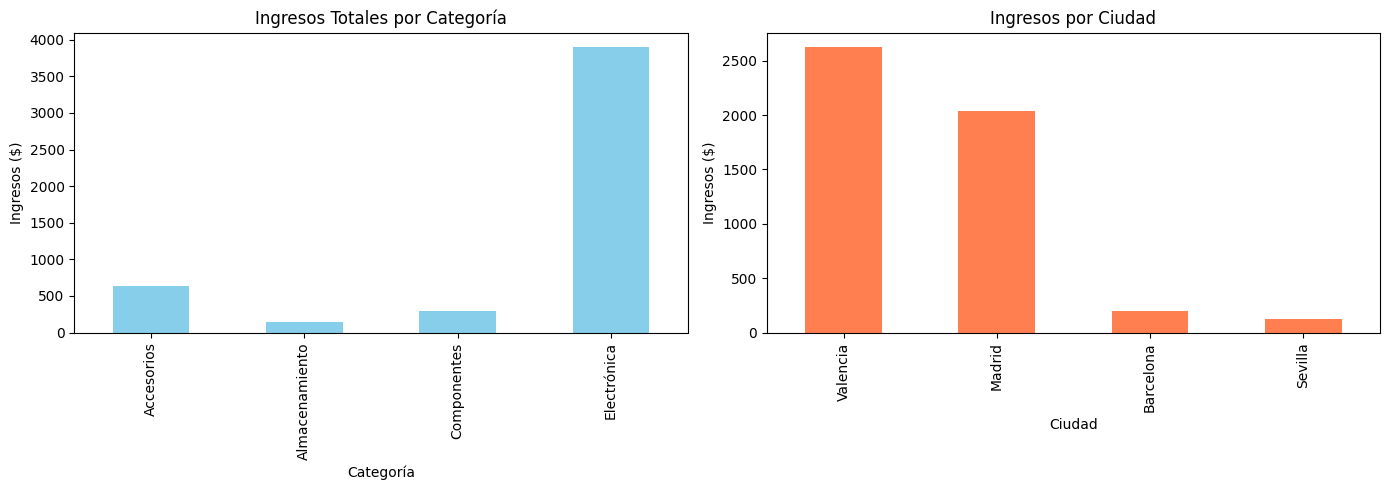

In [28]:
# Visualización de resultados
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Ingresos por categoría
df_productos_top.groupby('categoria')['ingresos_totales'].sum().plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_title('Ingresos Totales por Categoría')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_xlabel('Categoría')

# Gráfico 2: Ventas por ciudad
df_ciudades.plot(x='ciudad', y='ingresos_totales', kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Ingresos por Ciudad')
axes[1].set_ylabel('Ingresos ($)')
axes[1].set_xlabel('Ciudad')
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show()

## 11. Ejercicios Prácticos

### 📖 SQL + Pandas - El Poder Combinado

**pandas puede leer directamente desde SQL** - lo mejor de ambos mundos:
- SQL para filtrar/agregar en la DB (eficiente)
- Pandas para análisis avanzado en Python

**pd.read_sql_query() - Ejecutar query y obtener DataFrame:**
```python
df = pd.read_sql_query("SELECT * FROM clientes", conn)
```

**Ventajas:**
- Automáticamente convierte tipos SQL → pandas
- Retorna DataFrame listo para análisis
- Eficiente con grandes volúmenes (filtras en DB, analizas muestra)

**Flujo típico:**
1. Conectar a DB con sqlite3
2. Ejecutar query con pd.read_sql_query()
3. Analizar con pandas (groupby, plot, etc.)
4. Opcional: Escribir resultados de vuelta con df.to_sql()

**df.to_sql() - Guardar DataFrame en tabla:**
```python
df.to_sql('nombre_tabla', conn, if_exists='replace', index=False)
```

Parámetros:
- `if_exists='fail'` - Error si existe (default)
- `if_exists='replace'` - Sobrescribe
- `if_exists='append'` - Agrega filas

In [29]:
# Ejercicio 1: Encuentra los productos que nunca se han vendido
query = '''
SELECT p.nombre, p.categoria, p.precio, p.stock
FROM productos p
LEFT JOIN ventas v ON p.producto_id = v.producto_id
WHERE v.venta_id IS NULL
'''
df = pd.read_sql_query(query, conn)
print("Productos sin ventas:")
print(df)

Productos sin ventas:
Empty DataFrame
Columns: [nombre, categoria, precio, stock]
Index: []


In [30]:
# Ejercicio 2: Calcula el valor total del inventario
query = '''
SELECT 
    categoria,
    SUM(precio * stock) as valor_inventario,
    SUM(stock) as unidades_totales
FROM productos
GROUP BY categoria
ORDER BY valor_inventario DESC
'''
df = pd.read_sql_query(query, conn)
print("Valor del inventario por categoría:")
print(df)
print(f"\nValor total del inventario: ${df['valor_inventario'].sum():,.2f}")

Valor del inventario por categoría:
        categoria  valor_inventario  unidades_totales
0     Electrónica           24000.0                35
1      Accesorios            7300.0               135
2  Almacenamiento            6000.0                40
3     Componentes            3500.0                35

Valor total del inventario: $40,800.00


In [31]:
# Ejercicio 3: Encuentra los días con más ventas
query = '''
SELECT 
    fecha_venta,
    COUNT(*) as num_transacciones,
    SUM(total) as total_dia
FROM ventas
GROUP BY fecha_venta
ORDER BY total_dia DESC
LIMIT 5
'''
df = pd.read_sql_query(query, conn)
print("Top 5 días con más ventas:")
print(df)

Top 5 días con más ventas:
  fecha_venta  num_transacciones  total_dia
0  2024-06-08                  1     2400.0
1  2024-06-01                  1     1200.0
2  2024-06-10                  1      300.0
3  2024-06-04                  1      300.0
4  2024-06-03                  1      225.0


## 12. Uso de SQLAlchemy para mayor flexibilidad

In [32]:
# Crear engine con SQLAlchemy
engine = create_engine(f'sqlite:///{db_path}')

# Leer datos con SQLAlchemy
query = "SELECT * FROM productos"
df_products = pd.read_sql_query(query, engine)
print("Productos (usando SQLAlchemy):")
print(df_products.head())

Productos (usando SQLAlchemy):
   producto_id               nombre    categoria  precio  stock  \
0            1      Laptop Dell XPS  Electrónica  1200.0     15   
1            2       Mouse Logitech   Accesorios    25.0     60   
2            3     Teclado Mecánico   Accesorios    75.0     40   
3            4  Monitor Samsung 27"  Electrónica   300.0     20   
4            5            Webcam HD   Accesorios    80.0     35   

        fecha_creacion  
0  2025-12-07 22:01:57  
1  2025-12-07 22:01:57  
2  2025-12-07 22:01:57  
3  2025-12-07 22:01:57  
4  2025-12-07 22:01:57  


In [33]:
# Escribir DataFrame a SQL
df_nuevo = pd.DataFrame({
    'nombre': ['Nuevo Producto 1', 'Nuevo Producto 2'],
    'categoria': ['Test', 'Test'],
    'precio': [99.99, 149.99],
    'stock': [10, 15]
})

# df_nuevo.to_sql('productos', engine, if_exists='append', index=False)
print("DataFrame listo para insertar (comentado para no duplicar datos)")
print(df_nuevo)

DataFrame listo para insertar (comentado para no duplicar datos)
             nombre categoria  precio  stock
0  Nuevo Producto 1      Test   99.99     10
1  Nuevo Producto 2      Test  149.99     15


## 13. Limpieza

In [34]:
# Cerrar conexiones
conn.close()
print("Conexión cerrada")

Conexión cerrada


## Resumen y Mejores Prácticas

### Conceptos Clave:
1. **SELECT**: Consultar datos de una o más tablas
2. **WHERE**: Filtrar resultados con condiciones
3. **JOIN**: Combinar datos de múltiples tablas
4. **GROUP BY**: Agrupar datos para agregaciones
5. **ORDER BY**: Ordenar resultados
6. **INSERT/UPDATE/DELETE**: Operaciones CRUD

### Mejores Prácticas SQL:
- Usar nombres descriptivos para tablas y columnas
- Definir claves primarias y foráneas
- Indexar columnas frecuentemente consultadas
- Usar parámetros en lugar de concatenar strings (evitar SQL injection)
- Siempre hacer COMMIT después de modificaciones
- Cerrar conexiones cuando termines
- Usar transacciones para operaciones críticas

### Integración con Pandas:
- `pd.read_sql_query()`: Ejecutar consultas y obtener DataFrame
- `df.to_sql()`: Insertar DataFrame en base de datos
- SQLAlchemy: Mayor flexibilidad y portabilidad

### Recursos Adicionales:
- [SQLite Tutorial](https://www.sqlitetutorial.net/)
- [W3Schools SQL](https://www.w3schools.com/sql/)
- [Pandas SQL](https://pandas.pydata.org/docs/user_guide/io.html#sql-queries)

---

## 🧭 Navegación

**← Anterior:** [Pandas: Fundamentos para Análisis de Datos](03_pandas_fundamentos.ipynb)

**Siguiente →:** [Limpieza y Preparación de Datos →](05_limpieza_datos.ipynb)

**📚 Índice de Nivel Junior:**
- [📊 Junior - 01. Introducción a la Ingeniería de Datos](01_introduccion_ingenieria_datos.ipynb)
- [🐍 Junior - 02. Python para Manipulación de Datos](02_python_manipulacion_datos.ipynb)
- [Pandas: Fundamentos para Análisis de Datos](03_pandas_fundamentos.ipynb)
- [SQL Básico para Ingeniería de Datos](04_sql_basico.ipynb) ← 🔵 Estás aquí
- [Limpieza y Preparación de Datos](05_limpieza_datos.ipynb)
- [📊 Visualización de Datos en Ingeniería de Datos](06_visualizacion_datos.ipynb)
- [🔄 Git y Control de Versiones para Ingeniería de Datos](07_git_control_versiones.ipynb)
- [🌐 APIs REST y Web Scraping para Ingeniería de Datos](08_apis_web_scraping.ipynb)
- [🎯 Proyecto Integrador 1: Pipeline ETL Completo](09_proyecto_integrador_1.ipynb)
- [🚀 Proyecto Integrador 2: Pipeline Near Real-Time, Scheduling y Alertas](10_proyecto_integrador_2.ipynb)

**🎓 Otros Niveles:**
- [Nivel Junior](../nivel_junior/README.md)
- [Nivel Mid](../nivel_mid/README.md)
- [Nivel Senior](../nivel_senior/README.md)
- [Nivel GenAI](../nivel_genai/README.md)
- [Negocio LATAM](../negocios_latam/README.md)
